Ex1. For the XOR problem \
Implement the neural network algorithm to solve the problem using Pytorch

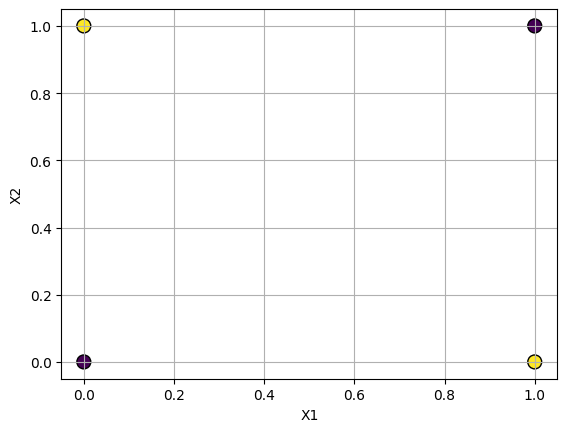

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim

X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], s=100, cmap='viridis', edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()


In [31]:
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.layer1 = nn.Linear(2, 2)
        self.layer2 = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.sigmoid(self.layer1(x))
        x = torch.sigmoid(self.layer2(x))
        return x

model = XORNet()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.5)

num_epochs = 10000
losses = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

predictions = model(X)

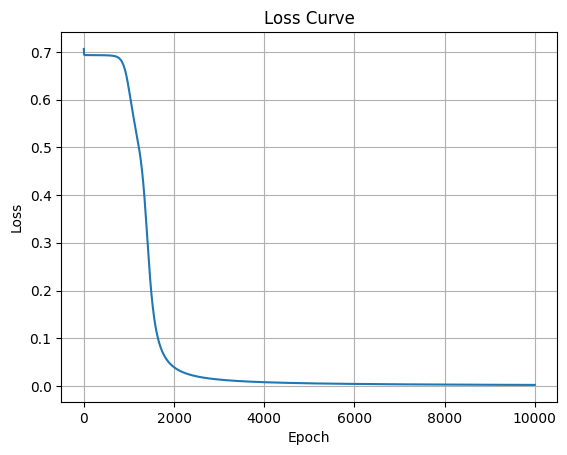

In [32]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.grid(True)
plt.show()


Ex2. Given dataset MNIST \
- Implement the neural network algorithm with the above data using Pytorch
- Adjust the learning rate, draw the corresponding loss graph.
- Divide the train/test set in 80/20 ratio, calculate the MSE, RSME, MAE, MAPE indexes on the test set.

In [37]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

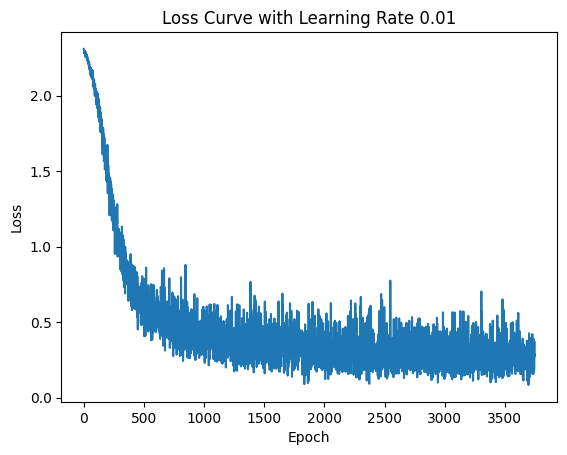

In [40]:
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.layer1 = nn.Linear(28*28, 500)
        self.layer2 = nn.Linear(500, 250)
        self.layer3 = nn.Linear(250, 10)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

model = MNISTNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 5
losses = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)

        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve with Learning Rate 0.01')
plt.show()

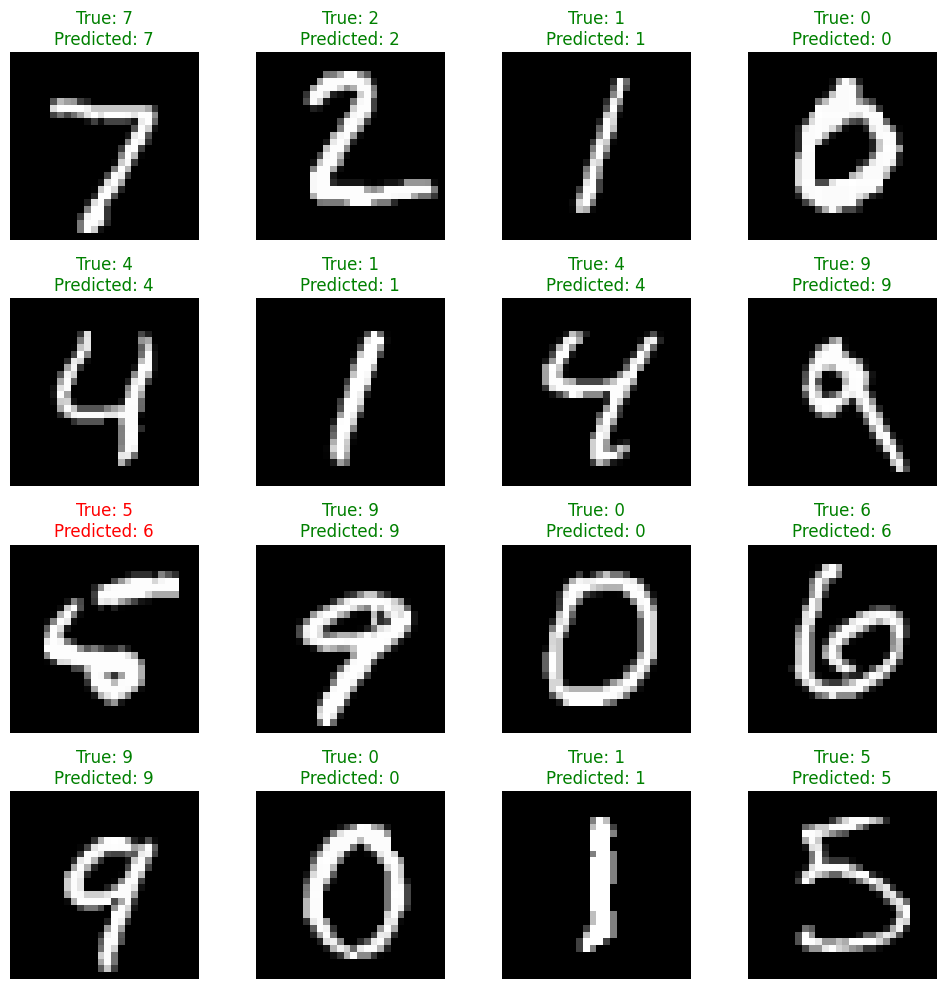

In [47]:
import matplotlib.pyplot as plt

dataiter = iter(test_loader)
images, labels = dataiter.__next__()

outputs = model(images.reshape(-1, 28*28))
_, predicted = torch.max(outputs, 1)

fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for idx, ax in enumerate(axes.ravel()):
    ax.imshow(images[idx].squeeze(), cmap='gray')
    ax.set_title(f"True: {labels[idx].item()}\nPredicted: {predicted[idx].item()}", color=("green" if predicted[idx]==labels[idx] else "red"))
    ax.axis('off')

plt.tight_layout()
plt.show()


Ex3. Why does the softmax function use the exponential function (e) and not another number like 2, 3 or 4

1. It amplifies differences between the input values, helping differentiate clearly between high and low probabilities.
2. When computing derivatives during backpropagation in neural networks, using e simplifies the calculations.
3. The function ${e^x}$ is continuous and differentiable everywhere, making it suitable for optimization in neural networks.